In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv("engine_perfomence.csv")
df

,Engine_Speed_RPM,Fuel_Efficiency
0,500.000000,-2458.934731
1,513.026052,-2433.443544
2,526.052104,-2409.403597
3,539.078156,-2382.461235
4,552.104208,-2356.380454
...,...,...
495,6947.895792,-6193.962316
496,6960.921844,-6235.515689
497,6973.947896,-6276.468124
498,6986.973948,-6318.931002


In [3]:
x = df[["Engine_Speed_RPM"]]
y = df["Fuel_Efficiency"]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [5]:
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

In [6]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred = model.predict(x_test_poly)
y_pred

c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 1 features as input.

In [ ]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test,y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2score:.3f}")

MSE: 0.59
RMSE: 0.77
R² Score: 1.000


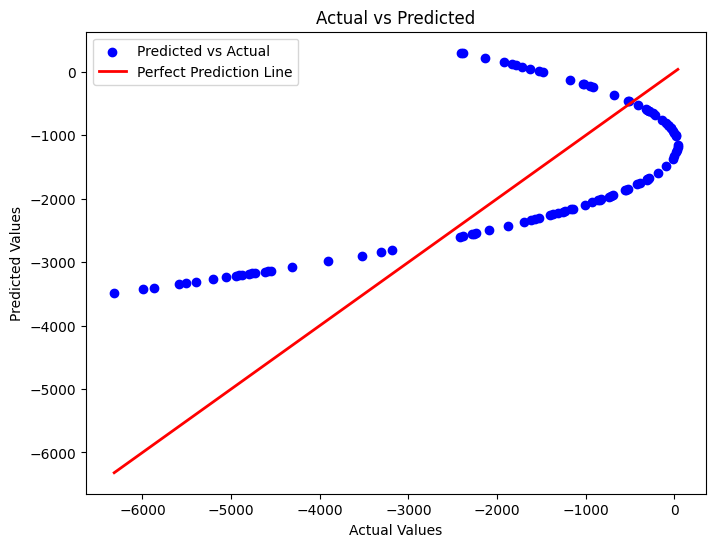

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()